# Nome: Matheus da Silva Oliveira
# DRE: 118178020

## 1

Temos $T=c_0x^{c_1}$, mas para utilizar regressão, precisamos que $c_1$ seja um termo linear. Assim, operando a equação encontramos
\begin{align*}
    \ln(T) &= \ln(c_0x^{c_1})\\
    &= \ln(c_0) + \ln(x^{c_1})\\
    \ln(T) &= \ln(c_0) + c_1\ln(x)
\end{align*}
Fazendo uma mudança de variável,
\begin{align*}
    \overline{c_0} &= \ln(c_0)\\
    \overline{c_1} &= c_1\\
    \overline{y} &= \ln(T)
\end{align*}
Então utlizamos regressão na equação
\begin{align*}
    \overline{y} &= \overline{c_0} + \overline{c_1}\ln(x)
\end{align*}
e o sistema através dos dados será
$$
\begin{bmatrix}
    1 & \ln(0.1)\\
    1 & \ln(0.2)\\
    1 & \ln(0.4)\\
    1 & \ln(0.8)\\
    1 & \ln(0.9)
\end{bmatrix}
\begin{bmatrix}
    \overline{c_0}\\
    \overline{c_1}
\end{bmatrix}
=
\begin{bmatrix}
    \ln(22)\\
    \ln(43)\\
    \ln(84)\\
    \ln(210)\\
    \ln(320)
\end{bmatrix}
$$
Depois de computar $\overline{c_0}$, calculamos $c_0 = e^{\overline{c_0}}$ para encontrar o valor de $c_0$. O algoritmo abaixo computa as variáveis que queremos:

In [85]:
using LinearAlgebra

V = 
[
    1 log(0.1);
    1 log(0.2);
    1 log(0.4);
    1 log(0.8);
    1 log(0.9);
]

# Valores y_barra
y_b = 
[
    log(22);
    log(43);
    log(84);
    log(210);
    log(320);
]
# Computa as variáveis c_barra
c_b = V\y_b

# Computa c_0
c_0 = exp(c_b[1])

c_1 = c_b[2]

# Printa o resultado
println("c_0 = ", c_0)
println("c_1 = ", c_1)

# Gera a função T aproximadora e calcula T(0.3) com 3 casas decimais
T(x) = c_0*x^c_1
println("T(0.3) = ", round(T(0.3),digits=3))


c_0 = 295.232768178912
c_1 = 1.171329448559714
T(0.3) = 72.061


## 2

### a

Como visto em aula e no vídeo do Abel, a fórmula da integração numérica pelo método do trapézio é
$$
    \int_{a}^{b} f(x)\, dx = \frac{h}{2}\left(f(a) + 2\sum_{i=1}^{n-1} f(a+ih) + f(b)\right)
$$
onde $h$ é a dimensão dos subintervalos. A função abaixo computa essa soma.

In [77]:

# f: Função que será integrada
# a: Início do intervalo de integração
# b: Fim do intervalo de integração
# n: Número de subintervalos 
function trapezio(f,a,b,n)
    # Calcula h
    h = (b-a)/n
    S = 0
    for i in 1:(n-1)
        # Calcula o somatório central da fórmula.
        S += f(a+i*h) 
    end
    # Calcula o restante dos termos da fórmula
    return (h/2)*(f(a)+2*S+f(b))
end

trapezio (generic function with 1 method)

A função $v(t)$ abaixo calcula a velocidade para um $t^*$ relativo, ou seja, para valores de $t$ diferentes dos que foram passados na tabela. Isso é feito para conseguirmos utilizar mais facilmente a função trapézio.

In [78]:
function v(t)
    # Valores da velocidade
    V = [0 185 319 447 742 1325 1445 4151]
    # Valores de t relativos, ou seja, t = 0, t = 1, ..., t = 7. 
    return V[floor(Int8,t)+1]
end

# Tempo inicial.
t_i = 0
# Tempo final.
t_f = 7
# Número de intervalo igual a 7
n = 7

println("Altura = ", trapezio(v,t_i,t_f,n))

Altura = 6538.5


### b

Pelo resultado (139) encontrado no livro, o erro do método do trapézio é inferior a
$$
\frac{h^2(b-a)M}{12}
$$
onde $M$ é o valor máximo de $|f''(x)|$ no intervalo $[a,b]$. Neste caso, precisaríamos da segunda derivada da função $v$.

### c

A matriz será
$$
\begin{bmatrix}
    0 & 1\\
    10 & 1\\
    15 & 1\\
    20 & 1\\
    32 & 1\\
    59 & 1\\
    62 & 1\\
    125 & 1
\end{bmatrix}
\begin{bmatrix}
    c_0\\
    c_1
\end{bmatrix}
=
\begin{bmatrix}
   0\\
   185\\
   319\\
   447\\
   742\\
   1325\\
   1445\\
   4151
\end{bmatrix}
$$
pois $v(t) = c_0t + c_1$.

In [79]:
V =
[
    0 1;
    10 1;
    15 1;
    20 1;
    32 1;
    59 1;
    62 1;
    125 1;
    
]

# Velocidades
y = 
[
    0;
    185;
    319;
    447; 
    742;
    1325;
    1445;
    4151;
    
]

# Executa a regressão 
c = V\y
# Constantes
c_0 = c[1]
c_1 = c[2]

# Constroi a função
f(t) = c_0*t + c_1
# Aqui utilizamos os tempos t_i dados na tabela, pois a função é contínua
a = 0
b = 125

# Printa o resultado
println("c_0 = ", c_0)
println("c_1 = ", c_1)
println("Altura = ", trapezio(f,a,b,100))

c_0 = 32.438909320952575
c_1 = -232.97096383346047
Altura = 224307.60859075916


## 3

### a

Sabemos que o intervalo de integração é de 0 a 1, pois $A_c = \pi r^2 = \pi$, então $r=1$, e também porque estamos no primeiro quadrante. Sendo assim, isolando $y$, temos
$$
y = \sqrt{1-x^2}
$$
Como queremos h = 0.1, então
\begin{align*}
h &= \frac{b-a}{n}\\
0.1 &= \frac{1-0}{n}\\
n &= 10
\end{align*}
Novamente, como estamos no primeiro quadrante, vamos calcular apenas $\frac{1}{4}$ da área total do círculo. Com isso, precisamos multiplicar a integral por 4 para termos o valor de $\pi$ aproximado. 

In [80]:
f(x) = sqrt(1-x^2)
a = 0
b = 1
n = 10
println("π ≈ ", 4*trapezio(f,a,b,n))

π ≈ 3.1045183262483182


### b

Calculando o módulo da segunda derivada $y''$, encontramos
$$
|y''| = \left|-\frac{1}{\sqrt{(1-x^2)}(1-x^2)}\right| = \frac{1}{\sqrt{(1-x^2)}(1-x^2)}
$$
pois estamos no intervalo $[0,1]$. Como é possivel notar, o maior valor dessa derivada ocorre apenas quando $x \to 1$, mas nunca temos um valor máximo exato, pois o limite é infinito. Com isso é impossível calcular o erro através dessa fórmula, pois não é possivel garantir um valor máximo.

## 4

Queremos computar uma integral $I$ do tipo
$$
I = \int_{a}^{b}\int_{f_1(y)}^{f_2(y)} f(x,y) \,dx\,dy
$$
que pode ser reescrita como
$$
I = \int_{a}^{b} F(y) \,dy
$$
onde
$$
F(x) = \int_{f_1(y)}^{f_2(y)} f(x,y) \,dx
$$
Utilizando o método do trapézio, temos a fórmula 
$$
I = \int_{a}^{b} F(y) \,dy = \frac{h}{2}\left(F(a) + 2\sum_{i=1}^{n-1} F(a+ih) + F(b)\right)
$$
que pode ser vista como
$$
I = \frac{h}{2}\left(\int_{f_1(a)}^{f_2(a)} f(x,a) \,dx + 2\sum_{i=1}^{n-1} \int_{f_1(a+ih)}^{f_2(a+ih)} f(x,a+ih) \,dx + \int_{f_1(b)}^{f_2(b)} f(x,b) \,dx\right)
$$
Dessa forma, podemos utilizar o método do trapézio para calcular cada integral separadamente na fórmula acima. O algoritmo abaixo computa esse resultado:

In [81]:
# f: Função com duas variáveis que será integrada
# f1: Função que delimita o limite inferior na integral mais interna
# f2: Função que delimita o limite superior na integral mais interna
# a: Constante que delimita o limite inferior na integral mais externa
# b: Constante que delimita o limite superior na integral mais externa
# n: Número de subintervalos
function Integral_Dupla(f,f1,f2,a,b,n)
    # Calcula h
    h = (b-a)/n
    S = 0
    for i in 1:(n-1)
        # Calcula o somatório central da fórmula.
        y_i = a+i*h
        # Função apenas de x com y constante
        p1(x) = f(x,y_i)
        S += trapezio(p1,f1(y_i),f2(y_i),n)
    end
    # Calcula o restante dos termos da fórmula
    # Funções apenas de x com y constante
    p2(x) = f(x,a)
    p3(x) = f(x,b)
    return (h/2)*( trapezio(p2,f1(a),f2(a),n) + 2*S +  trapezio(p3,f1(b),f2(b),n) )
    
end

Integral_Dupla (generic function with 1 method)

In [82]:
# Teste
f(x,y) = x*y
a = 1
b = 4
h(y) = y
g(y) = y^2+1
n = 1000

Integral_Dupla(f,h,g,a,b,n)

376.8754949999498

*Ref.: https://www.youtube.com/watch?v=0EYLa7ETgwg*

## 5

O método do gradiente descendente pode ser resumido basicamente na fórmula iterativa
$$
    X_{t+1} = X_t - \eta\nabla F(X_t)
$$
onde $-\nabla F(X)$ é o vetor que sempre aponta para o maior declive da função $F$. O vetor $X_t$ é utilizado para saber a direção e o sentido desse declive a partir de uma certa posição no espaço. A constante $\eta$ é utilizada para que haja um controle na iteração, ou seja, que o método tenda a um valor finito e $X_{t+1}$ deverá ser o vetor mais próximo do mínimo da função queremos minimizar.
Esta função é
$$
F(c_0,c_1) = \sum_{i=0}^{4} (c_0x_i^{c_1} - T(x_i))^2
$$
O algoritmo abaixo computa o método

c_0 = 346.3291589671983
c_1 = 1.5641882924926658


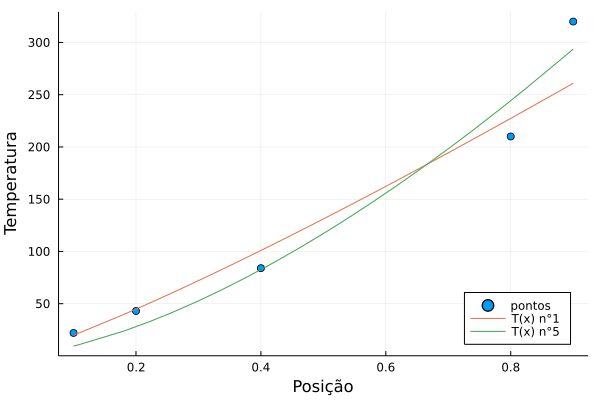

In [87]:
using LinearAlgebra
using Plots

# Vetor gradiente
function ∇F(X)
    # Variáveis que queremos encontrar
    c0 = X[1]
    c1 = X[2]
    # Vetor gradiente sendo calculado. Abaixo podemos notar as derivadas parciais da função F calculadas
    return [
        # Derivada parcial F_c0
        2*(c0*0.1^c1-22)*0.1^c1 + 2*(c0*0.2^c1-43)*0.2^c1 + 2*(c0*0.4^c1-84)*0.4^c1 + 2*(c0*0.8^c1-210)*0.8^c1 + 2*(c0*0.9^c1-320)*0.9^c1;
        # Derivada parcial F_c1
        2*(c0*0.1^c1-22)*c0*0.1^c1*log(0.1) + 2*(c0*0.2^c1-43)*c0*0.2^c1*log(0.2) + 2*(c0*0.4^c1-84)*c0*0.4^c1*log(0.4) + 2*(c0*0.8^c1-210)*c0*0.8^c1*log(0.8) + 2*(c0*0.9^c1-320)*c0*0.9^c1*log(0.9) 
    ]
end

# Constante eta
η = 0.00001
# Usado como critério de parada.
dif = 0.00000000001

# Chute inicial qualquer
X = [1; 1]
# Inicializa pX = X_{t+1} 
pX = X - η*∇F(X)

while(true)
    # Se a norma da diferença dos vetores for menor que o critério de parada, termina.
    if norm(pX - X) > dif
        # Atualiza X
        X = pX
        pX = X - η*∇F(X)
    else
        break 
    end
end

# Printa o resultado
println("c_0 = ", pX[1])
println("c_1 = ", pX[2])

# Nova função T2 com as novas constantes encontradas
T2(x) = pX[1]*x^pX[2]

# Dados das posições e temperaturas da número 1
pontos = [(0.1,22),(0.2,43),(0.4,84),(0.8,210),(0.9,320)]

scatter(pontos, legend=:bottomright, label = "pontos", xlabel = "Posição", ylabel = "Temperatura")

# Plot da função encontrada na número 1
plot!(T, label = "T(x) n°1")
# Plot da nova função encontrada neste exercício
plot!(T2, label = "T(x) n°5")

Através do gráfico acima, podemos perceber que pelo método do gradiente descendente também conseguimos uma boa aproximação para $c_0$ e $c_1$.

*Ref.: https://www.youtube.com/watch?v=s0VhfvCB0Vw*